The script generates graphs for **variable fractional Laplacian**

In [166]:
using JLD2
using BenchmarkTools
include("hmat.jl")
@pyimport matplotlib2tikz as mpl

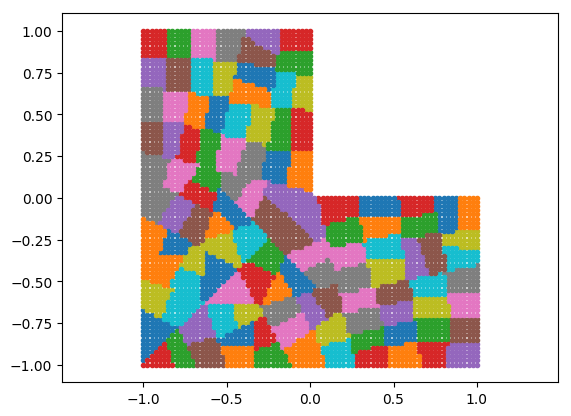

In [196]:
@load "data/D40.jld2" data
X = data.loc;
c = construct_cluster(X, 64)
plot(c, leaf=true)
axis("equal")
mpl.save("latex/figures/D40.tex")

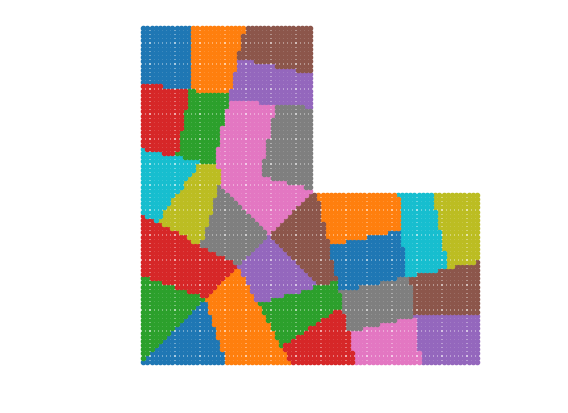

In [195]:
c = construct_cluster(X, 300)
plot(c, leaf=true)
axis("equal")
axis("off")
savefig("latex/figures/parallel.png")

In [199]:
H = construct_hmat(data.A, c, 64, 10, 1e-4, -1)
info(H)

Dense matrix = 1542, Low Rank Matrix = 622, Levels = 8, Goodness = 963


(1542, 622, 8, 0.19402169414885004)

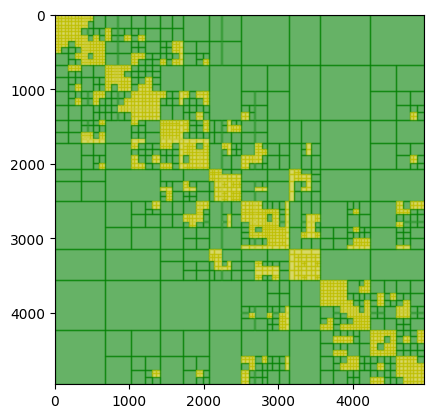

In [202]:
matshow(H)
savefig("latex/figures/M40.pdf")
# mpl.save("latex/figures/M40.tex")

In [114]:
verify_matrix_error(H, data.A[c.P, c.P])
verify_matvec_error(H, data.A[c.P, c.P])

Matrix Error = 2.0647822612220277
Matvec Error = 0.00019060435055826696


In [115]:
HH = copy(H)
@time lu!(HH);

x = rand(size(H,1))
y = data.A[c.P, c.P]*x
B = copy(data.A[c.P, c.P])
F = @time lu!(B)
x2 = @time F\y;
x1 = @time HH\y
rel_error(x, x1)

  7.964446 seconds (3.41 M allocations: 2.639 GiB, 12.56% gc time)
  0.411702 seconds (7 allocations: 19.703 KiB)
  0.020278 seconds (6 allocations: 39.047 KiB)
  0.268154 seconds (457.91 k allocations: 19.553 MiB)


0.00855318367914491

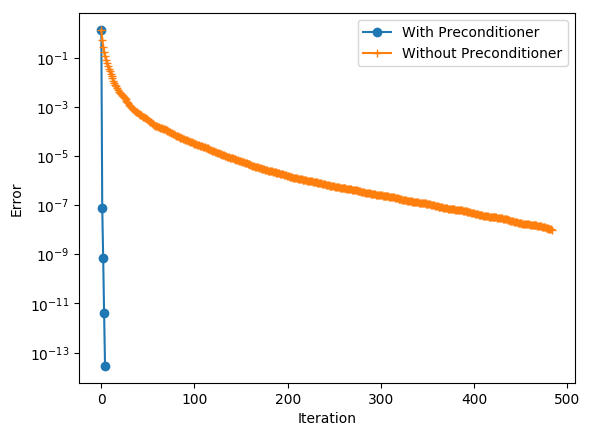

In [122]:
include("tools.jl")
y1, err1 = pygmres_with_call_back(data.A[c.P, c.P], y, HH, false)
y2, err2 = pygmres_with_call_back(data.A[c.P, c.P], y, nothing, false)
semilogy(err1,"o-",label="With Preconditioner")
semilogy(err2, "+-", label="Without Preconditioner")
legend()
xlabel("Iteration")
ylabel("Error")
mpl.save("latex/figures/iter40.tex")

## Efficiency

In [150]:
# R = [[2.9207 0.0922229 0.00661132 0.00905069 0.0065773] [7.19702 0.424049 0.0226574 0.0196658 0.00668042] [25.1211 4.03125 0.0979376 0.0569944 0.0141911]]
N = 30
@load "data/D$N.jld2" data
X = data.loc;
c = construct_cluster(X, 64)
H = construct_hmat(data.A, c, 64, 20, 1e-4, div(size(X,1),8))
info(H)
HH = copy(H)
t1 = @timed lu!(HH);

invP = inverse_permutation(c.P)
y = data.F[c.P]
B = copy(data.A[c.P, c.P])
t2 = @timed F = lu!(B)
t3 = @timed x2 = F\y;
t4 = @timed x1 = HH\y
e = rel_error(x2, x1)
T = [t1[2] t2[2] t3[2] t4[2] e]


Dense matrix = 264, Low Rank Matrix = 337, Levels = 7, Goodness = 546


1×5 Array{Float64,2}:
 3.90804  0.0890365  0.00604935  0.00825805  0.00135189

In [151]:
# R = [[2.9207 0.0922229 0.00661132 0.00905069 0.0065773] [7.19702 0.424049 0.0226574 0.0196658 0.00668042] [25.1211 4.03125 0.0979376 0.0569944 0.0141911]]
N = 40
@load "data/D$N.jld2" data
X = data.loc;
c = construct_cluster(X, 64)
H = construct_hmat(data.A, c, 64, 20, 1e-4, div(size(X,1),8))
info(H)
HH = copy(H)
t1 = @timed lu!(HH);

invP = inverse_permutation(c.P)
y = data.F[c.P]
B = copy(data.A[c.P, c.P])
t2 = @timed F = lu!(B)
t3 = @timed x2 = F\y;
t4 = @timed x1 = HH\y
e = rel_error(x2, x1)
T = [t1[2] t2[2] t3[2] t4[2] e]


Dense matrix = 470, Low Rank Matrix = 575, Levels = 8, Goodness = 626


1×5 Array{Float64,2}:
 8.12565  0.420279  0.0213585  0.017481  0.00167465

In [153]:
# R = [[2.9207 0.0922229 0.00661132 0.00905069 0.0065773] [7.19702 0.424049 0.0226574 0.0196658 0.00668042] [25.1211 4.03125 0.0979376 0.0569944 0.0141911]]
N = 60
@load "data/D$N.jld2" data
X = data.loc;
c = construct_cluster(X, 64)
H = construct_hmat(data.A, c, 64, 20, 1e-4, div(size(X,1),8))
info(H)
HH = copy(H)
t1 = @timed lu!(HH);

invP = inverse_permutation(c.P)
y = data.F[c.P]
B = copy(data.A[c.P, c.P])
t2 = @timed F = lu!(B)
t3 = @timed x2 = F\y;
t4 = @timed x1 = HH\y
e = rel_error(x2, x1)
T = [t1[2] t2[2] t3[2] t4[2] e]


Dense matrix = 1163, Low Rank Matrix = 1196, Levels = 10, Goodness = 785


1×5 Array{Float64,2}:
 26.1701  3.76687  0.0966806  0.0578209  0.00180417

In [154]:
# R = [[2.9207 0.0922229 0.00661132 0.00905069 0.0065773] [7.19702 0.424049 0.0226574 0.0196658 0.00668042] [25.1211 4.03125 0.0979376 0.0569944 0.0141911]]
N = 80
@load "data/D$N.jld2" data
X = data.loc;
c = construct_cluster(X, 64)
H = construct_hmat(data.A, c, 64, 20, 1e-4, div(size(X,1),8))
info(H)
HH = copy(H)
t1 = @timed lu!(HH);

invP = inverse_permutation(c.P)
y = data.F[c.P]
B = copy(data.A[c.P, c.P])
t2 = @timed F = lu!(B)
t3 = @timed x2 = F\y;
t4 = @timed x1 = HH\y
e = rel_error(x2, x1)
T = [t1[2] t2[2] t3[2] t4[2] e]


Dense matrix = 2187, Low Rank Matrix = 2242, Levels = 11, Goodness = 874


1×5 Array{Float64,2}:
 65.081  20.3861  0.339401  0.138662  0.00133042

In [204]:
# R = [[2.9207 0.0922229 0.00661132 0.00905069 0.0065773] [7.19702 0.424049 0.0226574 0.0196658 0.00668042] [25.1211 4.03125 0.0979376 0.0569944 0.0141911]]
N = 100
@load "data/D$N.jld2" data
X = data.loc;
c = construct_cluster(X, 64)
H = construct_hmat(data.A, c, 64, 20, 1e-4, div(size(X,1),8))
info(H)
HH = copy(H)
t1 = @timed lu!(HH);

invP = inverse_permutation(c.P)
y = data.F[c.P]
B = copy(data.A[c.P, c.P])
t2 = @timed F = lu!(B)
t3 = @timed x2 = F\y;
t4 = @timed x1 = HH\y
e = rel_error(x2, x1)
T = [t1[2] t2[2] t3[2] t4[2] e]


Dense matrix = 3823, Low Rank Matrix = 3477, Levels = 11, Goodness = 1000


1×5 Array{Float64,2}:
 124.387  74.219  0.717313  0.429414  0.0016748

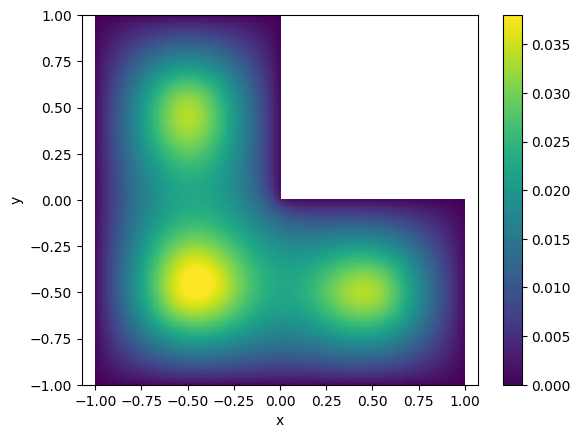

In [207]:
showsol(x2[invP], X)
axis("equal")
savefig("latex/figures/sol100.pdf")
# mpl.save("latex/figures/sol100.tex")

In [206]:
savefig("latex/figures/sol100.pdf")

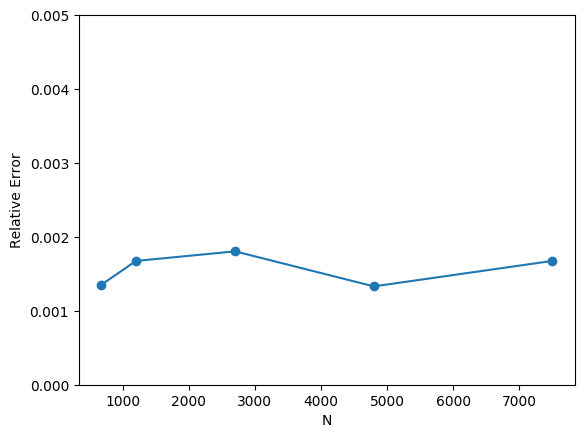

In [168]:
E = [0.00135189;0.00167465;0.00180417;0.00133042;0.0016748]
plot(map(Int64, [30 ;40 ;60 ;80 ;100].^2 * 3/4), E, "o-")
ylim(0,0.005)
xlabel("N")
ylabel("Relative Error")
mpl.save("latex/figures/relative_error.tex")

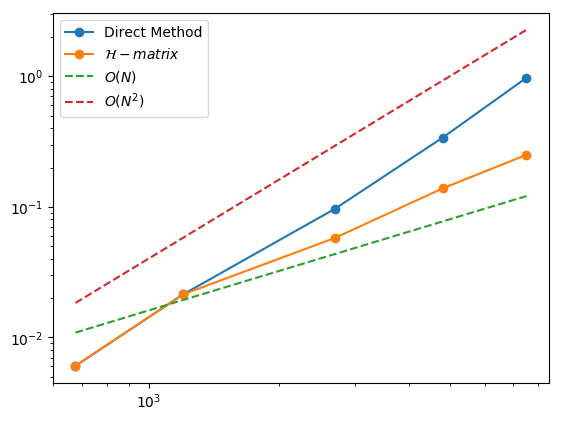

In [186]:
using Polynomials
T1 = [0.00604935;0.0213585;0.0966806;0.339401;0.972231]
T2 = [0.00604935;0.0213585;0.0578209;0.138662;0.250155]
NT = map(Int64, [30; 40; 60; 80 ;100].^2 * 3/4)
loglog(NT, T1, "o-", label="Direct Method")
r = polyfit(log.(NT), log.(T1), 1)


loglog(NT, T2, "o-", label=L"\mathcal{H}-matrix")
r[1] = 1.0
loglog(NT, 2e3*exp.(r(log.(NT))), "--", label=L"O(N)")
r[1] = 2.0
loglog(NT, 5*exp.(r(log.(NT))), "--", label=L"O(N^2)")
legend()
mpl.save("latex/figures/vfl_error.tex")